#### o Module Code: CSMAD21
#### o Assignment report Title: Coursework
#### o Student Number: 29813140
#### o Date (when the work completed): 05/01/2022
#### o Actual hrs spent for the assignment: 50
#### o Assignment evaluation (3 key points): I learnt Network Analysis,Clustering and how to approach practical data science problems

In [ ]:
pip install requests pandas matplotlib seaborn numpy scikit-learn nest_asyncio twint

# Task 1 – Data Gathering, Pre-processing and EDA

In [1]:

import nest_asyncio
nest_asyncio.apply()


In [2]:
import twint

In [3]:
import pandas as pd

In [4]:
c = twint.Config()

In [6]:
# Configure Twint to obtain AOC Tweets and Retweets

c.Username = "AOC"
c.Retweets = True
c.Pandas = True
c.Limit = 300

# Run
twint.run.Profile(c)

aoc = twint.storage.panda.Tweets_df

aoc.head()



1477293553655193603 2022-01-01 15:00:04 +0000 <AOC> Happy New Year everyone 🎊🪅 may we all enjoy a meaningful, healthy, and blessed year to come.
1477024675943399426 2021-12-31 21:11:39 +0000 <AOC> RT @TheKingCenter: #DidYouKnow  In 1954, #BettyWhite was criticized after having Arthur Duncan, a Black tap dancer, on her show.  Her respo…
1477008202629795842 2021-12-31 20:06:11 +0000 <AOC> The fact that these people are so creepy/weird yet are also the ones responsible for shaping the NEWS HEADLINES we all see in media should be really concerning.   I don’t even want to know what knuckle-dragging thoughts these people have all day while covering women in politics
1477005949181341701 2021-12-31 19:57:14 +0000 <AOC> I’m glad you felt the need to share that with the world.  Don’t worry, this is a totally normal thought to have and share as an editor of a right-wing website, and totally doesn’t prove my point at all.  I hear if you say it enough times you’ll actually start to believe it 😌
147

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1477293553655193603,1477293553655193603,1.641049e+12,2022-01-01 15:00:04,+0000,,Happy New Year everyone 🎊🪅 may we all enjoy a ...,en,[],[],...,,,,,,[],,,,
1,1477024675943399426,1477024675943399426,1.640985e+12,2021-12-31 21:11:39,+0000,,"RT @TheKingCenter: #DidYouKnow In 1954, #Bett...",en,"[didyouknow, bettywhite]",[],...,,,39547629,"#DidYouKnow\n\nIn 1954, #BettyWhite was critic...",1477001097726337026,[],2021-12-31 19:37:57 GMT Standard Time,,,
2,1477008202629795842,1477005949181341701,1.640981e+12,2021-12-31 20:06:11,+0000,,The fact that these people are so creepy/weird...,en,[],[],...,,,,,,[],,,,
3,1477005949181341701,1477005949181341701,1.640981e+12,2021-12-31 19:57:14,+0000,,I’m glad you felt the need to share that with ...,en,[],[],...,,,,,,[],,,,
4,1477003212234371072,1477000469318885385,1.640980e+12,2021-12-31 19:46:21,+0000,,It’s starting to get old ignoring the very obv...,en,[],[],...,,,,,,[],,,,


In [114]:
#Select the most recent 300 tweets and retweets
aoc1 = aoc.iloc[0:300]
aoc1

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1477293553655193603,1477293553655193603,1.641049e+12,2022-01-01 15:00:04,+0000,,Happy New Year everyone 🎊🪅 may we all enjoy a ...,en,[],[],...,,,,,,[],,,,
1,1477024675943399426,1477024675943399426,1.640985e+12,2021-12-31 21:11:39,+0000,,"RT @TheKingCenter: #DidYouKnow In 1954, #Bett...",en,"[didyouknow, bettywhite]",[],...,,,39547629,"#DidYouKnow\n\nIn 1954, #BettyWhite was critic...",1477001097726337026,[],2021-12-31 19:37:57 GMT Standard Time,,,
2,1477008202629795842,1477005949181341701,1.640981e+12,2021-12-31 20:06:11,+0000,,The fact that these people are so creepy/weird...,en,[],[],...,,,,,,[],,,,
3,1477005949181341701,1477005949181341701,1.640981e+12,2021-12-31 19:57:14,+0000,,I’m glad you felt the need to share that with ...,en,[],[],...,,,,,,[],,,,
4,1477003212234371072,1477000469318885385,1.640980e+12,2021-12-31 19:46:21,+0000,,It’s starting to get old ignoring the very obv...,en,[],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1451165853639233542,1450900038717161472,1.634820e+12,2021-10-21 13:37:55,+0000,,@chrislhayes One thing I was shocked by here i...,en,[],[],...,,,,,,"[{'screen_name': 'chrislhayes', 'name': 'Chris...",,,,
296,1451163784303759363,1450900038717161472,1.634819e+12,2021-10-21 13:29:42,+0000,,@chrislhayes It’s Beltway Brain. Lots of polit...,en,[],[],...,,,,,,"[{'screen_name': 'chrislhayes', 'name': 'Chris...",,,,
297,1451053795836932098,1451053795836932098,1.634793e+12,2021-10-21 06:12:38,+0000,,RT @chrislhayes: This an example of what I was...,en,[],[],...,,,4207961,This an example of what I was talking about ye...,1450900038717161472,[],2021-10-20 20:01:40 GMT Daylight Time,,,
298,1451028014314229764,1451028014314229764,1.634787e+12,2021-10-21 04:30:12,+0000,,RT @Sifill_LDF: The population of Mississippi ...,en,[],[],...,,,1507338108,The population of Mississippi is nearly 40% Bl...,1451007778512797700,[],2021-10-21 03:09:47 GMT Daylight Time,,,


In [115]:
#Select the necessary attributes or columns
aoc_tweets = aoc1[["id","date","tweet","user_id","username","name","retweet","nlikes","nreplies","nretweets","user_rt_id","user_rt","retweet_id","retweet_date"]]

## EDA on AOC Account

In [15]:
b = twint.Config()

In [17]:
#Configure Twint to get AOC profile information

b.Username = "AOC"
b.Pandas = True
twint.run.Lookup(b)


aoc_accountinfo = twint.storage.panda.User_df

138203134 | Alexandria Ocasio-Cortez | @AOC | Private: False | Verified: True | Bio: US Representative,NY-14 (BX & Queens). In a modern, moral, & wealthy society, no American should be too poor to live. 💯% People-Funded, no lobbyist💰. She/her. | Location: Bronx + Queens, NYC | Url: https://t.co/1gpC8bdz39 | Joined: 2010-04-28 22:38:40 UTC | Tweets: 13407 | Following: 3556 | Followers: 12849300 | Likes: 34634 | Media: 888 | Avatar: https://pbs.twimg.com/profile_images/923274881197895680/AbHcStkl_normal.jpg


In [18]:
aoc_accountinfo.head()

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,138203134,Alexandria Ocasio-Cortez,AOC,"US Representative,NY-14 (BX & Queens). In a mo...",https://t.co/1gpC8bdz39,2010-04-28 22:38:40 UTC,2010-04-28,22:38:40 UTC,13407,"Bronx + Queens, NYC",3556,12849300,34634,888,False,True,https://pbs.twimg.com/profile_images/923274881...,https://pbs.twimg.com/profile_banners/13820313...


In [122]:
#No of followers AOC has
aoc_followers = int(aoc_accountinfo["followers"])
aoc_followers

12849300

In [123]:
#No of accounts AOC is following
aoc_following = int(aoc_accountinfo["following"])
aoc_following

3556

In [124]:
#No of Posts AOC has liked
aoc_likes =int(aoc_accountinfo["likes"])
aoc_likes

34634

In [125]:
#No of Tweets by AOC which has an image or a video
aoc_media = int(aoc_accountinfo["media"])
aoc_media

888

In [23]:
#No of retweets out of the 300 most recent tweets
aoc_no_retweets = len(aoc1[aoc1["retweet"] == True])
aoc_no_retweets

105

In [26]:
#Percentage of Retweet to Tweet 
aoc_retweet_percentage = len(aoc1[aoc1["retweet"] == True])/len(aoc1)*100
aoc_retweet_percentage

35.0

## Morning Joe 

In [35]:
d = twint.Config()

In [39]:
# Configure Twint to obtain Morning Joe Tweets and Retweets

d.Username = "Morning_Joe"
d.Retweets = True
d.Pandas = True
d.Limit = 300

# Run
twint.run.Profile(d)

meh1 = twint.storage.panda.Tweets_df




1478513113523699715 2022-01-04 23:46:10 +0000 <Morning_Joe> Joining us tomorrow: @RepRaskin  https://t.co/VMVAiVALjq
1478409546993483782 2022-01-04 16:54:38 +0000 <Morning_Joe> Happy Birthday to the one-and-only Michael Stipe of @remhq. Stipe and Mike Mills were on MJ in November discussing the 25th-Anniversary Reissue of their landmark 10th album 'New Adventures in Hi-Fi'  https://t.co/zpKkavVPq5
1478393166462173186 2022-01-04 15:49:32 +0000 <Morning_Joe> .@JoeNBC on U.S.'s ongoing, 'naïve' relationship with Vladimir Putin and the commitment we made to the Ukrainian people: “It is time to stop being shocked and it is time to move aggressively, not towards war but toward defending our allies.”  https://t.co/QENiPzk5fS
1478390042284462087 2022-01-04 15:37:07 +0000 <Morning_Joe> RT @POLITICOPress: WATCH: With the one-year anniversary of the Jan. 6 Capitol siege on Thursday, @JonLemire joined @Morning_Joe to discuss…
1478365341721976835 2022-01-04 13:58:58 +0000 <Morning_Joe> RT @timkaine

In [40]:
#Select the most recent 300 tweets and retweets
meh2 = meh1.iloc[0:300]
meh2

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1478513113523699715,1478513113523699715,1.641340e+12,2022-01-04 23:46:10,+0000,,Joining us tomorrow: @RepRaskin https://t.co/...,en,[],[],...,,,,,,[],,,,
1,1478409546993483782,1478409546993483782,1.641315e+12,2022-01-04 16:54:38,+0000,,Happy Birthday to the one-and-only Michael Sti...,en,[],[],...,,,,,,[],,,,
2,1478393166462173186,1478393166462173186,1.641311e+12,2022-01-04 15:49:32,+0000,,".@JoeNBC on U.S.'s ongoing, 'naïve' relationsh...",en,[],[],...,,,,,,[],,,,
3,1478390042284462087,1478390042284462087,1.641311e+12,2022-01-04 15:37:07,+0000,,RT @POLITICOPress: WATCH: With the one-year an...,en,[],[],...,,,389759292,WATCH: With the one-year anniversary of the Ja...,1478388535128428545,[],2022-01-04 15:31:08 GMT Standard Time,,,
4,1478365341721976835,1478365341721976835,1.641305e+12,2022-01-04 13:58:58,+0000,,RT @timkaine: I started my normal 2 hour drive...,en,[],[],...,,,172858784,I started my normal 2 hour drive to DC at 1pm ...,1478357477158756352,[],2022-01-04 13:27:43 GMT Standard Time,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1470359206503067653,1470359206503067653,1.639396e+12,2021-12-13 11:45:27,+0000,,‘Normal’ Republican Ron DeSantis Wants to Lock...,en,[],[],...,,,,,,[],,,,
296,1470354127897124868,1470354127897124868,1.639395e+12,2021-12-13 11:25:16,+0000,,Former Trump aide Peter Navarro defies House s...,ca,[],[],...,,,,,,[],,,,
297,1470353762573246467,1470353762573246467,1.639395e+12,2021-12-13 11:23:49,+0000,,New York Gov. Kathy Hochul imposes statewide m...,en,[],[],...,,,,,,[],,,,
298,1470351953909661707,1470351953909661707,1.639394e+12,2021-12-13 11:16:38,+0000,,Recovery efforts begin after tornadoes rip thr...,en,[],[],...,,,,,,[],,,,


In [42]:
#Select the necessary attributes or columns
morningjoe_tweets = meh2[["id","date","tweet","user_id","username","name","retweet","nlikes","nreplies","nretweets","user_rt_id","user_rt","retweet_id","retweet_date"]]
morningjoe_tweets

,id,date,tweet,user_id,username,name,retweet,nlikes,nreplies,nretweets,user_rt_id,user_rt,retweet_id,retweet_date
0,1478513113523699715,2022-01-04 23:46:10,Joining us tomorrow: @RepRaskin https://t.co/...,254117355,Morning_Joe,Morning Joe,False,122,18,14,,,,
1,1478409546993483782,2022-01-04 16:54:38,Happy Birthday to the one-and-only Michael Sti...,254117355,Morning_Joe,Morning Joe,False,29,2,3,,,,
2,1478393166462173186,2022-01-04 15:49:32,".@JoeNBC on U.S.'s ongoing, 'naïve' relationsh...",254117355,Morning_Joe,Morning Joe,False,94,24,14,,,,
3,1478390042284462087,2022-01-04 15:37:07,RT @POLITICOPress: WATCH: With the one-year an...,254117355,Morning_Joe,Morning Joe,True,0,0,5,389759292,WATCH: With the one-year anniversary of the Ja...,1478388535128428545,2022-01-04 15:31:08 GMT Standard Time
4,1478365341721976835,2022-01-04 13:58:58,RT @timkaine: I started my normal 2 hour drive...,254117355,Morning_Joe,Morning Joe,True,0,0,3339,172858784,I started my normal 2 hour drive to DC at 1pm ...,1478357477158756352,2022-01-04 13:27:43 GMT Standard Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1470359206503067653,2021-12-13 11:45:27,‘Normal’ Republican Ron DeSantis Wants to Lock...,254117355,Morning_Joe,Morning Joe,False,365,256,105,,,,
296,1470354127897124868,2021-12-13 11:25:16,Former Trump aide Peter Navarro defies House s...,254117355,Morning_Joe,Morning Joe,False,66,60,27,,,,
297,1470353762573246467,2021-12-13 11:23:49,New York Gov. Kathy Hochul imposes statewide m...,254117355,Morning_Joe,Morning Joe,False,165,28,27,,,,
298,1470351953909661707,2021-12-13 11:16:38,Recovery efforts begin after tornadoes rip thr...,254117355,Morning_Joe,Morning Joe,False,34,11,5,,,,


## EDA on Morning Joe account

In [44]:
e = twint.Config()

In [48]:
#Configure Twint to get Morning Joe profile information

e.Username = "Morning_Joe"
e.Pandas = True
twint.run.Lookup(e)


morningjoe_accountinfo = twint.storage.panda.User_df

254117355 | Morning Joe | @Morning_Joe | Private: False | Verified: True | Bio: Live tweet during the show! Links to must-read op-eds and other features. Feed managed by MJ staff. Retweets not necessarily endorsements. | Location: New York, NY | Url: http://t.co/zaSnKrSGzz | Joined: 2011-02-18 16:48:40 UTC | Tweets: 55213 | Following: 589 | Followers: 744995 | Likes: 4102 | Media: 11321 | Avatar: https://pbs.twimg.com/profile_images/1062658115022319616/eZqFaXBF_normal.jpg


In [49]:
morningjoe_accountinfo

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,254117355,Morning Joe,Morning_Joe,Live tweet during the show! Links to must-read...,http://t.co/zaSnKrSGzz,2011-02-18 16:48:40 UTC,2011-02-18,16:48:40 UTC,55213,"New York, NY",589,744995,4102,11321,False,True,https://pbs.twimg.com/profile_images/106265811...,https://pbs.twimg.com/profile_banners/25411735...


In [118]:
#No of followers Morning Joe has
morningjoe_followers = int(morningjoe_accountinfo["followers"])
morningjoe_followers

744995

In [119]:
#No of accounts Morning Joe is following
morningjoe_following = int(morningjoe_accountinfo["following"])
morningjoe_following

589

In [120]:
#No of posts Morning Joe has liked
morningjoe_likes = int(morningjoe_accountinfo["likes"])
morningjoe_likes

4102

In [121]:
#No of posts of Morning Joe with images or videos
morningjoe_media = int(morningjoe_accountinfo["media"])
morningjoe_media

11321

In [57]:
#No of retweets out of the 300 most recent tweets
morningjoe_no_retweets = len(morningjoe_tweets[morningjoe_tweets["retweet"] == True])
morningjoe_no_retweets

75

In [60]:
#Percentage of Retweet to Tweet 
morningjoe_retweet_percentage = len(morningjoe_tweets[morningjoe_tweets["retweet"] == True])/len(morningjoe_tweets)*100
morningjoe_retweet_percentage

25.0

## Andrew Desiderio

In [61]:
f = twint.Config()

In [64]:
#Configure Twint to get Andrew Desiderio Tweets and Retweets

f.Username = "AndrewDesiderio"
f.Retweets = True
f.Pandas = True
f.Limit = 300

# Run
twint.run.Profile(f)

dav1 = twint.storage.panda.Tweets_df

1478513140648267782 2022-01-04 23:46:16 +0000 <AndrewDesiderio> RT @woodruffbets: Hannity text to Meadows on 12/31/20, per Jan. 6 committee: “We can’t lose the entire WH counsels office. I do NOT see Jan…
1478473971951624194 2022-01-04 21:10:38 +0000 <AndrewDesiderio> RT @dave_brown24: NEWS: The House Appropriations Committee is close to allocating $740 billion for the Pentagon, $25 billion more than Bide…
1478470396903137282 2022-01-04 20:56:25 +0000 <AndrewDesiderio> RT @frankthorp: And after getting stuck in a DC area snowstorm on I-95 that turned a 2 hour commute from Richmond, VA into a 27 hour slog,…
1478467011080593411 2022-01-04 20:42:58 +0000 <AndrewDesiderio> Sen. Merkley on the floor right now highlighting the victims of China’s crackdowns on labor activists and “Chinese genocide against the Uyghur communities.”  He says China shouldn’t be able to hide its “repression” behind the “glamor” of the upcoming Winter Olympics.  https://t.co/rCLaB086fa
1478459664278958088 2022-01-0

In [65]:
#Select the most recent 300 tweets and retweets
dav2 = dav1.iloc[0:300]
dav2

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1478513140648267782,1478513140648267782,1.641340e+12,2022-01-04 23:46:16,+0000,,RT @woodruffbets: Hannity text to Meadows on 1...,en,[],[],...,,,118245138,"Hannity text to Meadows on 12/31/20, per Jan. ...",1478490285319544835,[],2022-01-04 22:15:27 GMT Standard Time,,,
1,1478473971951624194,1478473971951624194,1.641331e+12,2022-01-04 21:10:38,+0000,,RT @dave_brown24: NEWS: The House Appropriatio...,en,[],[],...,,,2848493051,NEWS: The House Appropriations Committee is cl...,1478473902670106627,[],2022-01-04 21:10:21 GMT Standard Time,,,
2,1478470396903137282,1478470396903137282,1.641330e+12,2022-01-04 20:56:25,+0000,,RT @frankthorp: And after getting stuck in a D...,en,[],[],...,,,14007532,And after getting stuck in a DC area snowstorm...,1478470196205600773,[],2022-01-04 20:55:38 GMT Standard Time,,,
3,1478467011080593411,1478467011080593411,1.641329e+12,2022-01-04 20:42:58,+0000,,Sen. Merkley on the floor right now highlighti...,en,[],[],...,,,,,,[],,,,
4,1478459664278958088,1478459664278958088,1.641327e+12,2022-01-04 20:13:47,+0000,,Senate snow day #2 continues — no roll call vo...,en,[],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1468378141961998338,1468370358566801410,1.638924e+12,2021-12-08 00:33:24,+0000,,SCHUMER votes to block the weapons sale.,en,[],[],...,,,,,,[],,,,
296,1468377533813080065,1468377533813080065,1.638923e+12,2021-12-08 00:30:59,+0000,,News: House will vote tomorrow on a trio of Ch...,en,[],[],...,,,,,,[],,,,
297,1468370358566801410,1468370358566801410,1.638922e+12,2021-12-08 00:02:29,+0000,,Looks like this Senate vote on whether to bloc...,en,[],[],...,,,,,,[],,,,
298,1468367871172620288,1468364150241906689,1.638921e+12,2021-12-07 23:52:36,+0000,,McConnell also speaks in favor of the Biden ad...,en,[],[],...,,,,,,[],,,,


In [67]:
#Select the necessary attributes or columns
andrew_tweets = dav2[["id","date","tweet","user_id","username","name","retweet","nlikes","nreplies","nretweets","user_rt_id","user_rt","retweet_id","retweet_date"]]
andrew_tweets

,id,date,tweet,user_id,username,name,retweet,nlikes,nreplies,nretweets,user_rt_id,user_rt,retweet_id,retweet_date
0,1478513140648267782,2022-01-04 23:46:16,RT @woodruffbets: Hannity text to Meadows on 1...,427630477,AndrewDesiderio,Andrew Desiderio,True,0,0,2895,118245138,"Hannity text to Meadows on 12/31/20, per Jan. ...",1478490285319544835,2022-01-04 22:15:27 GMT Standard Time
1,1478473971951624194,2022-01-04 21:10:38,RT @dave_brown24: NEWS: The House Appropriatio...,427630477,AndrewDesiderio,Andrew Desiderio,True,0,0,7,2848493051,NEWS: The House Appropriations Committee is cl...,1478473902670106627,2022-01-04 21:10:21 GMT Standard Time
2,1478470396903137282,2022-01-04 20:56:25,RT @frankthorp: And after getting stuck in a D...,427630477,AndrewDesiderio,Andrew Desiderio,True,0,0,64,14007532,And after getting stuck in a DC area snowstorm...,1478470196205600773,2022-01-04 20:55:38 GMT Standard Time
3,1478467011080593411,2022-01-04 20:42:58,Sen. Merkley on the floor right now highlighti...,427630477,AndrewDesiderio,Andrew Desiderio,False,43,2,18,,,,
4,1478459664278958088,2022-01-04 20:13:47,Senate snow day #2 continues — no roll call vo...,427630477,AndrewDesiderio,Andrew Desiderio,False,11,1,3,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1468378141961998338,2021-12-08 00:33:24,SCHUMER votes to block the weapons sale.,427630477,AndrewDesiderio,Andrew Desiderio,False,29,1,3,,,,
296,1468377533813080065,2021-12-08 00:30:59,News: House will vote tomorrow on a trio of Ch...,427630477,AndrewDesiderio,Andrew Desiderio,False,45,2,27,,,,
297,1468370358566801410,2021-12-08 00:02:29,Looks like this Senate vote on whether to bloc...,427630477,AndrewDesiderio,Andrew Desiderio,False,27,13,13,,,,
298,1468367871172620288,2021-12-07 23:52:36,McConnell also speaks in favor of the Biden ad...,427630477,AndrewDesiderio,Andrew Desiderio,False,2,2,1,,,,


## EDA on Andrew Desiderio Account

In [75]:
g = twint.Config()

In [82]:
#Configure Twint to get Andrew Desiderio profile information

g.Username = "AndrewDesiderio"
g.Pandas = True
twint.run.Lookup(g)


andrew_accountinfo = twint.storage.panda.User_df

427630477 | Andrew Desiderio | @AndrewDesiderio | Private: False | Verified: True | Bio: @Politico congressional reporter covering national security & foreign policy. Proud Italian-American 🇮🇹 & Philly native. Go Birds. adesiderio@politico.com | Location: Washington, D.C. | Url: https://t.co/aJIFOgL9Pq | Joined: 2011-12-03 19:33:33 UTC | Tweets: 55677 | Following: 999 | Followers: 68793 | Likes: 30449 | Media: 5013 | Avatar: https://pbs.twimg.com/profile_images/1473138376069025795/ZeMy8VDp_normal.jpg


In [83]:
andrew_accountinfo

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,427630477,Andrew Desiderio,AndrewDesiderio,@Politico congressional reporter covering nati...,https://t.co/aJIFOgL9Pq,2011-12-03 19:33:33 UTC,2011-12-03,19:33:33 UTC,55677,"Washington, D.C.",999,68793,30449,5013,False,True,https://pbs.twimg.com/profile_images/147313837...,https://pbs.twimg.com/profile_banners/42763047...


In [126]:
#No of followers Andrew has
andrew_followers = int(andrew_accountinfo["followers"])
andrew_followers

68793

In [127]:
#No of accounts Andrew is follwing
andrew_following = int(andrew_accountinfo["following"])
andrew_following

999

In [128]:
#No of posts Andrew has liked
andrew_likes = int(andrew_accountinfo["likes"])
andrew_likes

30449

In [129]:
#No of posts Andrew has posted with images or videos
andrew_media = int(andrew_accountinfo["media"])
andrew_media

5013

In [89]:
#No of retweets out of the 300 most recent tweets
andrew_no_retweets =len(andrew_tweets[andrew_tweets["retweet"] == True])
andrew_no_retweets

64

In [90]:
#Percentage of Retweet to Tweet 
andrew_retweet_percentage =len(andrew_tweets[andrew_tweets["retweet"] == True])/len(andrew_tweets)*100
andrew_retweet_percentage

21.333333333333336

In [91]:
#Concatenating the 3 accounts with 300 accounts each to produce a 900 tweet dataset with all 3 accounts
result = pd.concat([aoc_tweets,morningjoe_tweets,andrew_tweets])
result

,id,date,tweet,user_id,username,name,retweet,nlikes,nreplies,nretweets,user_rt_id,user_rt,retweet_id,retweet_date
0,1477293553655193603,2022-01-01 15:00:04,Happy New Year everyone 🎊🪅 may we all enjoy a ...,138203134,AOC,Alexandria Ocasio-Cortez,False,100083,5948,4322,,,,
1,1477024675943399426,2021-12-31 21:11:39,"RT @TheKingCenter: #DidYouKnow In 1954, #Bett...",138203134,AOC,Alexandria Ocasio-Cortez,True,0,0,15606,39547629,"#DidYouKnow\n\nIn 1954, #BettyWhite was critic...",1477001097726337026,2021-12-31 19:37:57 GMT Standard Time
2,1477008202629795842,2021-12-31 20:06:11,The fact that these people are so creepy/weird...,138203134,AOC,Alexandria Ocasio-Cortez,False,37843,3593,1834,,,,
3,1477005949181341701,2021-12-31 19:57:14,I’m glad you felt the need to share that with ...,138203134,AOC,Alexandria Ocasio-Cortez,False,78472,6397,3844,,,,
4,1477003212234371072,2021-12-31 19:46:21,It’s starting to get old ignoring the very obv...,138203134,AOC,Alexandria Ocasio-Cortez,False,95584,14193,6403,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1468378141961998338,2021-12-08 00:33:24,SCHUMER votes to block the weapons sale.,427630477,AndrewDesiderio,Andrew Desiderio,False,29,1,3,,,,
296,1468377533813080065,2021-12-08 00:30:59,News: House will vote tomorrow on a trio of Ch...,427630477,AndrewDesiderio,Andrew Desiderio,False,45,2,27,,,,
297,1468370358566801410,2021-12-08 00:02:29,Looks like this Senate vote on whether to bloc...,427630477,AndrewDesiderio,Andrew Desiderio,False,27,13,13,,,,
298,1468367871172620288,2021-12-07 23:52:36,McConnell also speaks in favor of the Biden ad...,427630477,AndrewDesiderio,Andrew Desiderio,False,2,2,1,,,,


In [92]:
#Resetting Index
result = result.reset_index(drop=True)
result

,id,date,tweet,user_id,username,name,retweet,nlikes,nreplies,nretweets,user_rt_id,user_rt,retweet_id,retweet_date
0,1477293553655193603,2022-01-01 15:00:04,Happy New Year everyone 🎊🪅 may we all enjoy a ...,138203134,AOC,Alexandria Ocasio-Cortez,False,100083,5948,4322,,,,
1,1477024675943399426,2021-12-31 21:11:39,"RT @TheKingCenter: #DidYouKnow In 1954, #Bett...",138203134,AOC,Alexandria Ocasio-Cortez,True,0,0,15606,39547629,"#DidYouKnow\n\nIn 1954, #BettyWhite was critic...",1477001097726337026,2021-12-31 19:37:57 GMT Standard Time
2,1477008202629795842,2021-12-31 20:06:11,The fact that these people are so creepy/weird...,138203134,AOC,Alexandria Ocasio-Cortez,False,37843,3593,1834,,,,
3,1477005949181341701,2021-12-31 19:57:14,I’m glad you felt the need to share that with ...,138203134,AOC,Alexandria Ocasio-Cortez,False,78472,6397,3844,,,,
4,1477003212234371072,2021-12-31 19:46:21,It’s starting to get old ignoring the very obv...,138203134,AOC,Alexandria Ocasio-Cortez,False,95584,14193,6403,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1468378141961998338,2021-12-08 00:33:24,SCHUMER votes to block the weapons sale.,427630477,AndrewDesiderio,Andrew Desiderio,False,29,1,3,,,,
896,1468377533813080065,2021-12-08 00:30:59,News: House will vote tomorrow on a trio of Ch...,427630477,AndrewDesiderio,Andrew Desiderio,False,45,2,27,,,,
897,1468370358566801410,2021-12-08 00:02:29,Looks like this Senate vote on whether to bloc...,427630477,AndrewDesiderio,Andrew Desiderio,False,27,13,13,,,,
898,1468367871172620288,2021-12-07 23:52:36,McConnell also speaks in favor of the Biden ad...,427630477,AndrewDesiderio,Andrew Desiderio,False,2,2,1,,,,


## Explanation and Justification of the data cleaning and pre processing process


#### To obtain the twitter data, Twint package was used. Therefore, as the first step the necessary dependencies of the package and the twint package were installed to the environment. Then the twint package was configured to get the tweets and profile info of the three accounts namely Alexendra Ocasio Cortez(Politician), Morning Joe (TV show), Andrew Desiderio (Journalist). For the configuration, the following attributes were used.

#### Username – Username of the twitter account that needs to be searched
#### Retweets – Set as true to obtain the retweets that the user has retweeted
#### Pandas – Set as true, thereby the output would be in the form of a pandas dataframe
#### Limit – set to 300 to obtain the 300 most recent tweets and retweets of the user

#### Then the profile of the above users was search using with the above configurations to get the most recent 300 tweets and retweets of each.

#### Unfortunately, even though the limit function for each is set to 300, for every user more than slightly more than 300 records are obtained therefore I sliced the obtained dataframe to the most recent 300 tweets.

#### The resultant dataframe has 38 columns or attributes and 300 rows for each account but most of these attributes are not necessary for the other tasks. Therefore, I selected the below columns from the dataframe.

#### ["id","date","tweet","user_id","username","name","retweet","nlikes","nreplies","nretweets","user_rt_id","user_rt","retweet_id","retweet_date"]

#### Then I concatenated all 3 account’s 300 tweets of each user and reset the index to obtain 900 rows of most recent tweets and retweets of all 3 users with 14 columns.


## EDA

#### Process

#### For each account the lookup function of the twint package was used to get the profile information by using their username. Then the following attributes were found out for each user.
#### 1.Number of Followers
#### 2.Number of Following
#### 3.Number of Likes by user
#### 4.Number of tweets with media
#### 5.Number of Retweets out of the 300 tweets
#### 6.Retweet percentage out of the 300 tweets. 

#### The below table shows all the analysed data results.


In [131]:
#Producing EDA finding table of all 3 accounts
eda1 = {
    "Account name": ["AOC","Morning Joe","Andrew Desiderio "],
    "No. of followers":[aoc_followers,morningjoe_followers,andrew_followers],
    "No. of Following":[aoc_following,morningjoe_following,andrew_following],
    "No. of Likes":[aoc_likes,morningjoe_likes,andrew_likes],
    "No. of Posts with media": [aoc_media,morningjoe_media,andrew_media],
    "No of Retweets out of 300":[aoc_no_retweets,morningjoe_no_retweets,andrew_no_retweets],
    "Retweet Percentage out of 300":[aoc_retweet_percentage,morningjoe_retweet_percentage,andrew_retweet_percentage]
}

eda = pd.DataFrame(eda1)
eda

,Account name,No. of followers,No. of Following,No. of Likes,No. of Posts with media,No of Retweets out of 300,Retweet Percentage out of 300
0,AOC,12849300,3556,34634,888,105,35.000000
1,Morning Joe,744995,589,4102,11321,75,25.000000
2,Andrew Desiderio,68793,999,30449,5013,64,21.333333


## Discussion of EDA

#### As seen from the table AOC has the most number of followers with 12.8 million while Andrew Desiderio has the least with 68793 followers.

#### AOC also follows most number of third party acccounts with her follwing 3556 accounts while Morning Joe following the least amount with 589

#### A similar trend is observed in the number of posts liked by the users, as AOC has liked the most posts with 34634 likes and morning has liked the lowest with 4102 likes.

#### Morning Joe has the most posts or tweets with media with 11321 of their post consisting of media while AOC has the least with 888 media posts.

#### Out of the 3 Accounts when considering their 300 most recent tweets, AOC has the highest amounts of retweets with 105 with a percentage of 35% retweet percentage while Andrew Desiderio has the least with 64 retweets and 21.3% retweet percentage.

In [342]:
#Checking the general information of the 900 tweet dataset
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            900 non-null    object
 1   date          900 non-null    object
 2   tweet         900 non-null    object
 3   user_id       900 non-null    int64 
 4   username      900 non-null    object
 5   name          900 non-null    object
 6   retweet       900 non-null    bool  
 7   nlikes        900 non-null    int64 
 8   nreplies      900 non-null    int64 
 9   nretweets     900 non-null    int64 
 10  user_rt_id    900 non-null    object
 11  user_rt       900 non-null    object
 12  retweet_id    900 non-null    object
 13  retweet_date  900 non-null    object
dtypes: bool(1), int64(4), object(9)
memory usage: 92.4+ KB


# Task 2 – Network analysis

In [93]:
#Obtaining only the retweets and then reseting the index to obtain a new dataframe
result2 = result[result["retweet"] == True].reset_index(drop=True)
result2

,id,date,tweet,user_id,username,name,retweet,nlikes,nreplies,nretweets,user_rt_id,user_rt,retweet_id,retweet_date
0,1477024675943399426,2021-12-31 21:11:39,"RT @TheKingCenter: #DidYouKnow In 1954, #Bett...",138203134,AOC,Alexandria Ocasio-Cortez,True,0,0,15606,39547629,"#DidYouKnow\n\nIn 1954, #BettyWhite was critic...",1477001097726337026,2021-12-31 19:37:57 GMT Standard Time
1,1476982854949249033,2021-12-31 18:25:28,RT @birgitomo: Nurses should not have to pay b...,138203134,AOC,Alexandria Ocasio-Cortez,True,0,0,30349,1230463969,Nurses should not have to pay back student loa...,1476538207911256067,2021-12-30 12:58:36 GMT Standard Time
2,1476944739723325442,2021-12-31 15:54:00,RT @msolurin: Journalists have to stop using p...,138203134,AOC,Alexandria Ocasio-Cortez,True,0,0,16512,1046938994766958592,Journalists have to stop using passive voice t...,1476557975527563265,2021-12-30 14:17:09 GMT Standard Time
3,1474127528017149961,2021-12-23 21:19:25,RT @SenSanders: Given the serious crisis and t...,138203134,AOC,Alexandria Ocasio-Cortez,True,0,0,7604,29442313,Given the serious crisis and total failure of ...,1474017926546087937,2021-12-23 14:03:54 GMT Standard Time
4,1473778455825240069,2021-12-22 22:12:20,RT @MorePerfectUS: EXCLUSIVE: Two Amazon worke...,138203134,AOC,Alexandria Ocasio-Cortez,True,0,0,8181,1321935792416149505,EXCLUSIVE: Two Amazon workers died within hour...,1473765015689863176,2021-12-22 21:18:55 GMT Standard Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1468965392253026309,2021-12-09 15:26:56,RT @SenatePress: https://t.co/PhWokRHKfQ,427630477,AndrewDesiderio,Andrew Desiderio,True,0,0,22,2375533844,https://t.co/PhWokRHKfQ,1468962737849966606,2021-12-09 15:16:23 GMT Standard Time
240,1468964093436465167,2021-12-09 15:21:46,"RT @nielslesniewski: SCHUMER: ""Don't worry Bob...",427630477,AndrewDesiderio,Andrew Desiderio,True,0,0,4,140286364,"SCHUMER: ""Don't worry Bob, it's safe to be bet...",1468963979921743879,2021-12-09 15:21:19 GMT Standard Time
241,1468940827074437127,2021-12-09 13:49:19,RT @connorobrienNH: NEW: Democrats control the...,427630477,AndrewDesiderio,Andrew Desiderio,True,0,0,6,190360266,NEW: Democrats control the Congress and White ...,1468940774440148996,2021-12-09 13:49:06 GMT Standard Time
242,1468722518169210882,2021-12-08 23:21:50,RT @joshrogin: “Congress left its own members ...,427630477,AndrewDesiderio,Andrew Desiderio,True,0,0,35,15766082,“Congress left its own members in the dark &am...,1468720629029298176,2021-12-08 23:14:20 GMT Standard Time


In [94]:
#Check if there are any null values
result2.isnull().sum()

id              0
date            0
tweet           0
user_id         0
username        0
name            0
retweet         0
nlikes          0
nreplies        0
nretweets       0
user_rt_id      0
user_rt         0
retweet_id      0
retweet_date    0
dtype: int64

In [95]:
# Create an empty edge set
edges = set()
#Creating Edgelist
for index,row in result2.iterrows():
    a = int(row["user_id"])
    b = int(row["user_rt_id"])
    e = (a,b)
    edges.add(e)

In [235]:
#Display First 10 sample of the edge list
edgesli = list(edges)
edgesli[0:10]

[(138203134, 15675138),
 (138203134, 19170880),
 (254117355, 5562502),
 (427630477, 118245138),
 (254117355, 23588075),
 (254117355, 15520209),
 (254117355, 69080476),
 (427630477, 163871920),
 (427630477, 2375533844),
 (138203134, 288277167)]

In [97]:
#No of Edges
len(edges)

160

In [98]:
# Create an empty dictionary
network = {}

#Create Network List
for (a,b) in edges:
    #Check if key is in dictionary
    if a in network:
        network[a].add(b)
    else:
        network[a]={b}
    #Check if key is in dictionary
    if b in network:
        network[b].add(a)
    else:
        network[b]={a}
        
#Display Network List
network

{138203134: {775142,
  4207961,
  5770442,
  13524182,
  14246088,
  14296273,
  14335586,
  14779408,
  15675138,
  15891430,
  15952856,
  15954997,
  16370091,
  16635277,
  16868756,
  17451211,
  19170880,
  19847765,
  20508720,
  21728303,
  26165922,
  27481883,
  28785486,
  29201047,
  29442313,
  32871086,
  35586563,
  39155029,
  39547629,
  47747074,
  54239985,
  63013144,
  63252661,
  79342286,
  91478624,
  108408529,
  130557513,
  141286022,
  165791468,
  199068758,
  216776631,
  230997420,
  233985354,
  250492272,
  254117355,
  288277167,
  305216911,
  309197522,
  328300671,
  334385278,
  427630477,
  435331179,
  571214272,
  598921658,
  606776750,
  783792992,
  887924208,
  970207298,
  1206227149,
  1230463969,
  1330575260,
  1433584531,
  1507338108,
  1672053968,
  2293009039,
  2356566228,
  2384732965,
  2468762893,
  2826804048,
  3248744915,
  3353571554,
  4696552878,
  789122815798702080,
  798953701972938752,
  815733290955112448,
  1006419421

In [99]:
#Number of nodes
len(network)

156

In [100]:
#Import Networkx and create graph
import networkx as nx
G = nx.Graph()

In [101]:
#Add nodes to graph
for el in edges:
    li = list(el)
    G.add_nodes_from(li)

In [102]:
#Add Edges to graph
for el in edges:
    G.add_edge(*el)

In [103]:
#Number of nodes and edges of graph
G.number_of_nodes(),G.number_of_edges() 

(156, 160)

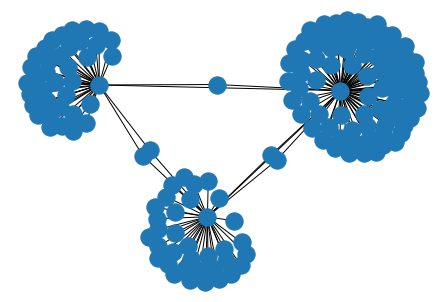

In [145]:
#Draw network graph
nx.draw(G)

#### This network graph visuzalization does not have the labels. Therefore I will first find user ids of the hubs in the graph which means users with more than one neighbour and find their usernames using twint and then add these to final graph. 

In [149]:
#FInd users with more than one neighbour except the three main accounts
ki = []
for j in network:
    if len(network[j])>1:
        if not(j == 138203134 or j == 254117355 or j == 427630477):
            ki.append(j)
ki

[182398325, 39155029, 250492272, 91478624, 14413466]

#### Finding out the Usernames of the above accounts using twint

In [165]:
v = twint.Config()

In [181]:
#Finding User info using twint
v.User_id  = "182398325"

twint.run.Lookup(v)

182398325 | Jonathan Lemire | @JonLemire | Private: False | Verified: True | Bio: White House Bureau Chief @Politico. Host of @WayTooEarly, 5 am on @MSNBC. @NBCNews analyst. Ex-@AP, Dad, Mr @carriemelago, Red Sox fan. JLemire@politico.com | Location: NYC/Washington | Url: https://t.co/NwH1jDfjqe | Joined: 2010-08-24 14:17:53 UTC | Tweets: 38554 | Following: 2386 | Followers: 260368 | Likes: 17385 | Media: 2688 | Avatar: https://pbs.twimg.com/profile_images/1406985195090231301/UvXUhhqI_normal.jpg


In [182]:
y = twint.Config()

In [186]:
#Finding User info using twint
y.User_id  = "39155029"

twint.run.Lookup(y)

39155029 | Manu Raju | @mkraju | Private: False | Verified: True | Bio: Chief Congressional Correspondent, @CNN. Roaming the Capitol halls, covering the Hill and politics. Die-hard Chicago sports fan. Wisconsin Badger for life. | Location: The Capitol | Url: https://t.co/GE66o8sU9Y | Joined: 2009-05-11 01:13:00 UTC | Tweets: 55595 | Following: 5846 | Followers: 615947 | Likes: 6078 | Media: 1690 | Avatar: https://pbs.twimg.com/profile_images/1036076785312718849/DqKNeMaJ_normal.jpg


In [188]:
x = twint.Config()

In [190]:
#Finding User info using twint
x.User_id  = "250492272"

twint.run.Lookup(x)

250492272 | Igor Bobic | @igorbobic | Private: False | Verified: True | Bio: Senior politics reporter at HuffPost. California raised, Bosnia born. Former Chargers fan. igor.bobic@huffpost.com | Location: Washington, D.C. | Url: https://t.co/hJ7Rv738Qh | Joined: 2011-02-11 05:44:35 UTC | Tweets: 103820 | Following: 1001 | Followers: 169498 | Likes: 34623 | Media: 6174 | Avatar: https://pbs.twimg.com/profile_images/1311307300674699266/L-HC1VG6_normal.jpg


In [196]:
m = twint.Config()

In [198]:
#Finding User info using twint
m.User_id  = "91478624"

twint.run.Lookup(m)

91478624 | Forbes | @Forbes | Private: False | Verified: True | Bio: Official account of Forbes, the world’s leading voice for entrepreneurial success and free enterprise, and home to breaking news, business, money and more. | Location: New York, NY | Url: https://t.co/6qjZ8PCpvM | Joined: 2009-11-21 02:09:57 UTC | Tweets: 349831 | Following: 5147 | Followers: 17366191 | Likes: 10268 | Media: 184513 | Avatar: https://pbs.twimg.com/profile_images/1448413506936639491/2mvOrPuF_normal.jpg


In [208]:
z = twint.Config()

In [211]:
#Finding User info using twint
z.User_id  = "14413466"

twint.run.Lookup(z)

14413466 | Jon Ralston | @RalstonReports | Private: False | Verified: True | Bio: CEO, The Nevada Independent. Your State. Your News. Your Voice. ralston@thenvindy.com #WeMatter | Location: Las Vegas, NV | Url: https://t.co/OX9zmuM4RJ | Joined: 2008-04-16 21:59:18 UTC | Tweets: 140208 | Following: 1881 | Followers: 143581 | Likes: 34833 | Media: 8236 | Avatar: https://pbs.twimg.com/profile_images/1410643212432068610/1xNcL6io_normal.jpg


### Final Graph with Labels

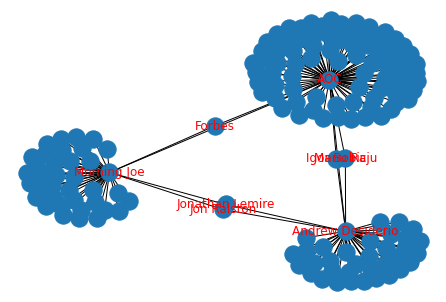

In [229]:
#Adding Labels to final graph

labeldict = {}
labeldict[138203134] = "AOC"
labeldict[254117355] = "Morning Joe"
labeldict[427630477] = "Andrew Desiderio"
labeldict[182398325] = "Jonathan Lemire"
labeldict[39155029] = "Manu Raju"
labeldict[250492272] = "Igor Bobic"
labeldict[91478624] = "Forbes"
labeldict[14413466] = "Jon Ralston"

#Draw final graph
nx.draw(G, with_labels=True, labels=labeldict,font_color="red")

#### As seen from the graph the blue dots the represent the nodes(Accounts) while the lines represents the edges(Retweets). There are 156 nodes and 160 edges in this graph. 

#### Also seen from the graph, AOC has retweeted the most while Morning Joe and Andrew Desiderio have roughly retweeted a similar amount therefore harder to differentiate from the graph.

#### AOC and Morning Joe have both retweeted a post from Forbes.
#### Andrew Desiderio and Morning Joe have both retweeted posts from Jon Ralston and John Lemire.
#### Andrew Desiderio and AOC have both retweeted posts from Manu Raju and Igor Bobic.


## Statistics and Explanations

### Degree Distribution

In [105]:
#Degree Distribution
g = G
nx.degree_histogram(g)


[0,
 148,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

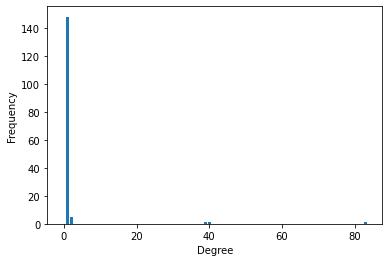

In [106]:
#Plot Degree Distribution

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.bar(range(0,len(nx.degree_histogram(g))),nx.degree_histogram(g))
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

### Explanation

#### This Degree Distribution shows the number of edges each node has. This shows that most nodes only have one edge while one node has around 80 edges. Around 5 nodes have 2 edges and 2 nodes have around 40 edges.

### Cluster Coefficient

In [107]:
#Cluster Coefficient
cc = nx.clustering(g)
cc

{138203134: 0.000881575080811049,
 15675138: 0,
 19170880: 0,
 254117355: 0.001282051282051282,
 5562502: 0,
 427630477: 0.002699055330634278,
 118245138: 0,
 23588075: 0,
 15520209: 0,
 69080476: 0,
 163871920: 0,
 2375533844: 0,
 288277167: 0,
 39547629: 0,
 21728303: 0,
 4207961: 0,
 598921658: 0,
 14007532: 0,
 325277943: 0,
 182398325: 0,
 18639734: 0,
 54239985: 0,
 79342286: 0,
 1330575260: 0,
 29201047: 0,
 180503626: 0,
 15766082: 0,
 2468762893: 0,
 2467791: 0,
 1087380412089987077: 0,
 268636316: 0,
 216776631: 0,
 15972530: 0,
 46417885: 0,
 1684234034: 0,
 783792992: 0,
 413364940: 0,
 1321935792416149505: 0,
 95270375: 0,
 4696552878: 0,
 15954997: 0,
 190360266: 0,
 2848493051: 0,
 19847765: 0,
 309197522: 0,
 29442313: 0,
 2293900364: 0,
 14597239: 0,
 14879434: 0,
 14293310: 0,
 25630016: 0,
 2836421: 0,
 1507338108: 0,
 39155029: 1.0,
 1006419421244678144: 0,
 1327651353578057729: 0,
 47991586: 0,
 817030635458011136: 0,
 230997420: 0,
 798953701972938752: 0,
 5770442

Text(0.5, 0, 'Clustering coeff.')

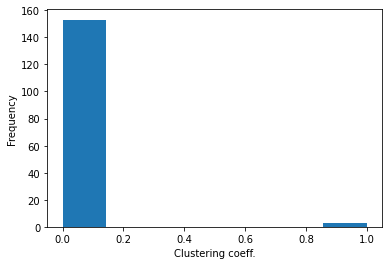

In [108]:
#Plot Cluster Coefficient
plt.hist(list(cc.values()),bins=7)
plt.ylabel("Frequency")
plt.xlabel("Clustering coeff.")

### Explanation

#### Cluster Coefficient shows how interconnected the neighbours of each node are and according to the above graph we can see that many nodes dont have interconnected neigbours while a few have really good interconnected neighbours

### Betweenness Centrality

In [230]:
#Betweenness Centrality
bc = nx.betweenness_centrality(g)
bc

{138203134: 0.8003491132523387,
 15675138: 0.0,
 19170880: 0.0,
 254117355: 0.4185588604943444,
 5562502: 0.0,
 427630477: 0.3987431922915794,
 118245138: 0.0,
 23588075: 0.0,
 15520209: 0.0,
 69080476: 0.0,
 163871920: 0.0,
 2375533844: 0.0,
 288277167: 0.0,
 39547629: 0.0,
 21728303: 0.0,
 4207961: 0.0,
 598921658: 0.0,
 14007532: 0.0,
 325277943: 0.0,
 182398325: 0.03616813294232648,
 18639734: 0.0,
 54239985: 0.0,
 79342286: 0.0,
 1330575260: 0.0,
 29201047: 0.0,
 180503626: 0.0,
 15766082: 0.0,
 2468762893: 0.0,
 2467791: 0.0,
 1087380412089987077: 0.0,
 268636316: 0.0,
 216776631: 0.0,
 15972530: 0.0,
 46417885: 0.0,
 1684234034: 0.0,
 783792992: 0.0,
 413364940: 0.0,
 1321935792416149505: 0.0,
 95270375: 0.0,
 4696552878: 0.0,
 15954997: 0.0,
 190360266: 0.0,
 2848493051: 0.0,
 19847765: 0.0,
 309197522: 0.0,
 29442313: 0.0,
 2293900364: 0.0,
 14597239: 0.0,
 14879434: 0.0,
 14293310: 0.0,
 25630016: 0.0,
 2836421: 0.0,
 1507338108: 0.0,
 39155029: 0.0,
 1006419421244678144: 0.0

Text(0.5, 0, 'betweenness centrality')

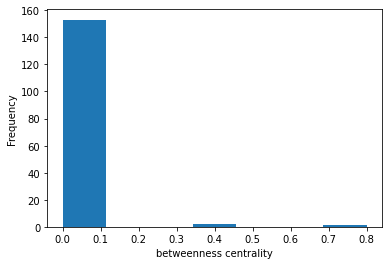

In [232]:
#Plot Betweenness Centrality
plt.hist(list(bc.values()),bins=7)
plt.ylabel("Frequency")
plt.xlabel("betweenness centrality")

### Explanation

#### Betweenness Centrality is a measure of the importance of a node in terms of the possible paths through the network. The above graph shows that many nodes are not important while there are some with mid level importance. But there are few with high importance and often connect different regions of the network. 

### Assortativity Coefficient

In [111]:
nx.degree_assortativity_coefficient(g)

-0.7805528494144052

### Explanation

#### Assortativity coefficient measures the correlation of nodes with interacting edges and this network shows high negative assortativity coefficient which means there is a weak tendancy of nodes to interact with similar nodes.

## Conclusion

#### There is small similarity between the accounts but as seen from graph and the statistics, They do not share that many interests other politics. Their retweeted contents and accounts are unique to each user with only around 5 accounts that have been retweeted by atleast two users.

#### This clearly shows that their is very low correlation between the 3 analysed users and their interests

## Lessons Learnt

#### I learnt how to do network analysis on social media services which will help me build a fake news detection mechanism in the future